Este colab fue desarrollado por Arnold Charry Armero.

# El Modelo EOQ (Economic Order Quantity)

El ingeniero de producción Ford Whitman Harris propuso en 1915 a la academia e industria estadounidense un modelo de inventarios para minimizar los costos anuales de comprar, mantener y ordenar un producto (Sipper & Bulfin, 1998). Este modelo es la base de la mayoría de modelos sofisticados de inventarios que se encuentran en la actualidad, ya que toma en cuenta de forma precisa los incrementos en costos que suceden debido al cambio en la decisión del tamaño de lote a comprar. En la gestión de inventarios de materia prima o ventas al menudeo funciona bastante bien cuando se tiene una demanda estable (Sipper & Bulfin, 1998). Es importante destacar que este modelo puede ser utilizado en la realidad si se cumplen sus respectivos supuestos.

**Supuestos:**

*   Existe un solo producto en el sistema de inventarios
*   La demanda es uniforme y determinística
*   No se permiten faltantes
*   No hay un tiempo de entrega
*   Tasa de reabastecimiento infinita, es decir, toda la cantidad ordenada llega al mismo tiempo.







La geometría del inventario de este modelo es la siguiente,

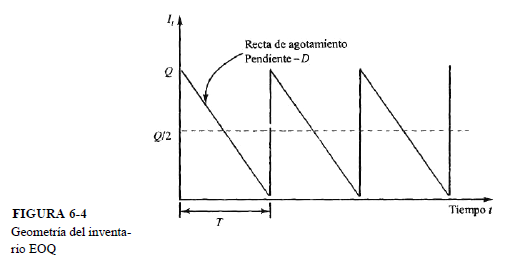

Matemáticamente, el modelo se expresa de la siguiente manera:

$$ K(Q)= cD + \frac{AD}{Q}+h\frac{Q}{2} $$

donde,

$ Q = \mathrm{Cantidad \:de \: lote \: a \: ordenar} $

$ c = \mathrm{Costo \: unitario \: de \: compra} $

$ D = \mathrm{Tasa \:de \: demanda} $

$ A = \mathrm{Costo \:unitario \: de \: ordenar} $

$ h = \mathrm{Costo \:unitario \: de \: mantener \: en \: inventario} $

$ K = \mathrm{Costo \: total \: promedio} $

Para saber la cantidad óptima de lote a ordenar, se debe derivar la función e
igualar a 0. Matemáticamente se expresa esto de la siguiente manera,

$$ \frac{dK(Q)}{dQ}= -\frac{AD}{Q^{2}}+\frac{h}{2}=0 $$

Despejando $Q$,

$$ Q^{*} = \sqrt{\frac{2AD}{h}} $$



Esta formula nos indica cuánto se debe ordenar con el fin de minimizar los costos de inventario. Ahora se continua con la implementación en código resolviendo el siguiente ejemplo.


**Ejemplo 6-1. Lote económico.** Un pequeño taller de soldadura usa varillas para soldar a una tasa
uniforme. Marvin, el dueño, compra las varillas a un proveedor local. Él estima que la demanda
anual es de alrededor de $1000$ libras. Para colocar una orden, tiene que gastar cerca de $\$ 3.60$ por la
llamada telefónica y el papeleo. Marvin paga $\$ 2$ por libra de varilla y sus costos de almacenaje están
basados en una tasa anual de $25$%. Analice el sistema.

In [ ]:
#Se importan las librerias
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Se definen los parámetros.
c = 2
D = 1000
A = 3.6
i = 0.25
h = i * c

In [ ]:
#Se define la función
def K(Q):
  """
  Calcula el costo total promedio tomando en
  cuenta el tamaño de lote Q ingresado

  Args:
    Q: Tamaño de lote seleccionado.

  Returns:
    K: Costo total promedio
  """
  return c*D + (A*D)/ Q + h*(Q/2)

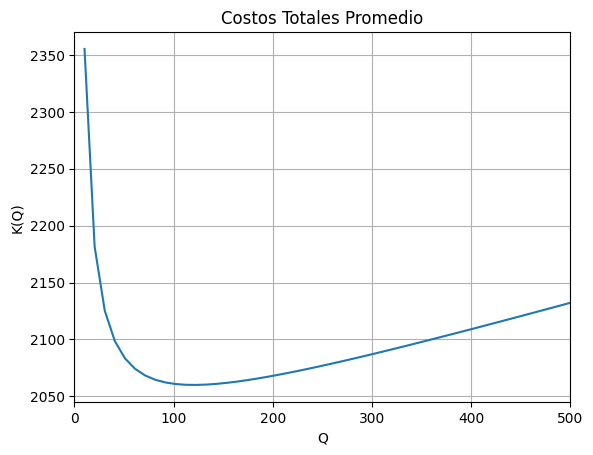

In [ ]:
#Se grafica la función para entender mejor su comportamiento
x = np.linspace(0, 500)
y = [K(Q) for Q in x]
plt.grid()
plt.title("Costos Totales Promedio")
plt.xlim(0, 500)
plt.xlabel('Q')
plt.ylabel('K(Q)')
plt.plot(x, y)

Para optimizar, se verán dos formas. La primera, es utilizando algoritmos de optimización que sirven para cualquier función. La segunda, es utilizando la formula del $Q^{*}$ optimizado.

Para cualquier función de una o varias variables,

In [ ]:
#Q inicial para la optimización
q0 = 50

#Optimización
result = optimize.minimize(K, q0, options={"disp": True}, method = 'SLSQP')
result

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2060.0000000020054
            Iterations: 10
            Function evaluations: 20
            Gradient evaluations: 10


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2060.0000000020054
       x: [ 1.200e+02]
     nit: 10
     jac: [-3.052e-05]
    nfev: 20
    njev: 10

In [ ]:
#Valor de Q optimizado
optimized_Q = result.x[0]
print("El tamaño de lote debe de ser de {} unidades".format(optimized_Q))

El tamaño de lote debe de ser de 119.99901894370038 unidades


In [ ]:
#Valor de K optimizado - Costo Optimizado
optimized_K = result.fun
print("El costo total minimizado es de ${}".format(optimized_K))

El costo total minimizado es de $2060.0000000020054


Empleando la formula obtenida,

In [ ]:
#Optimización - Q unidades
def optimized_formula_EOQ(c, D, A, i):
  return np.sqrt((2 * A * D) / (c * i))

print("El tamaño de lote debe de ser de {} unidades".format(optimized_formula_EOQ(2, 1000, 3.6, 0.25)))

El tamaño de lote debe de ser de 120.0 unidades


In [ ]:
#Valor de K optimizado - Costo Optimizado
def EOQ_function(c, D, A, i, Q):
  """
  Calcula el costo total promedio tomando en
  cuenta el tamaño de lote Q ingresado

  Args:
    c: Costo unitario del producto
    D: Tasa de Demanda
    A: Costo unitario de ordenar
    el producto
    i: Porcentaje de mantener en
    inventario
    Q: Tamaño de lote seleccionado.

  Returns:
    K: Costo total promedio
  """
  if Q == 0:
    return np.inf
  h = i * c #Costo de mantener el inventario
  return c*D + (A*D)/ Q + h*(Q/2)

print("El costo total minimizado es de ${}".format(EOQ_function(2, 1000, 3.6, 0.25, 120)))

El costo total minimizado es de $2060.0


Otra forma de optimizar con código sería la siguiente,

In [ ]:
Q = [50]

def total_cost(Q):
  cost = 0
  for i in range(0, len(Q)):
    cost += EOQ_function(2, 1000, 3.6, 0.25, Q)
  return cost

In [ ]:
result = optimize.basinhopping(total_cost, Q, minimizer_kwargs = {"method": "BFGS"}, niter = 100)
result

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 2060.0
                          x: [ 1.200e+02]
                        nit: 100
      minimization_failures: 0
                       nfev: 1492
                       njev: 746
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 2060.0
                                    x: [ 1.200e+02]
                                  nit: 9
                                  jac: [ 0.000e+00]
                             hess_inv: [[ 2.396e+02]]
                                 nfev: 22
                                 njev: 11

In [ ]:
#Valor de Q optimizado
optimized_Q = result.x[0]
print("El tamaño de lote debe de ser de {} unidades".format(optimized_Q))

El tamaño de lote debe de ser de 119.99999558730279 unidades


In [ ]:
#Valor de K optimizado - Costo Optimizado
optimized_K = result.fun
print("El costo total minimizado es de ${}".format(optimized_K))

El costo total minimizado es de $2060.0


Cuando el costo de ordenar y el costo de mantener el inventario se igualan, se obtiene el mínimo costo. Se observa en la siguiente gráfica:

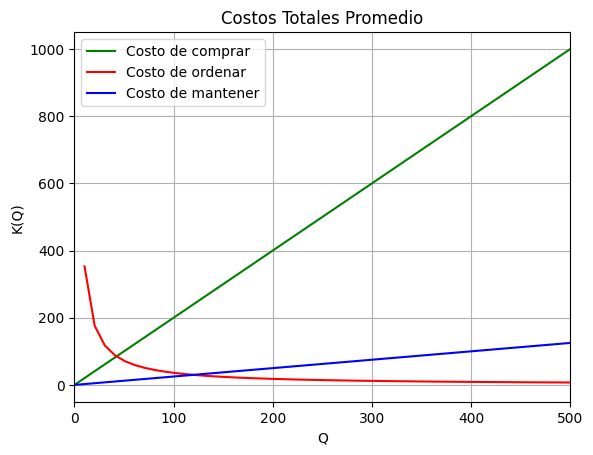

In [ ]:
def K1(Q):
  return c*Q
def K2(Q):
  return (A*D)/ Q
def K3(Q):
  return h*(Q/2)
x = np.linspace(0, 500)
y1 = [K1(Q) for Q in x]
y2 = [K2(Q) for Q in x]
y3 = [K3(Q) for Q in x]
plt.grid()
plt.title("Costos Totales Promedio")
plt.xlim(0, 500)
plt.xlabel('Q')
plt.ylabel('K(Q)')
plt.plot(x, y1, color = "green", label = "Costo de comprar")
plt.plot(x, y2, color = "red", label = "Costo de ordenar")
plt.plot(x, y3, color = "blue", label = "Costo de mantener")
plt.legend(loc = 'best')
plt.show()

De la longitud del ciclo del inventario, se calcula.


$$ T = \frac{Q}{D} $$


Donde $T$ es la cantidad de tiempo que transcurre mientras se termina el inventario.

In [ ]:
T = optimized_Q / D
print("El tiempo que transcurre mientras se agota el inventario es {} años.".format(T))

El tiempo que transcurre mientras se agota el inventario es 0.11999999558730279 años.


#### Referencias


*   Chopra, S., & Meindl, P. (2016). Supply chain management: Strategy, planning, and operation, global edition (6th ed.). Pearson Education.
*   Sipper, D., & Bulfin, R. L. (1998). Planeación y control de la producción.
*   Zill, D. G. (2000). Cálculo de una variable: trascendentes tempranas (4a. ed.).

